Optimization terminated successfully.
         Current function value: 4.250130
         Iterations: 56
         Function evaluations: 106


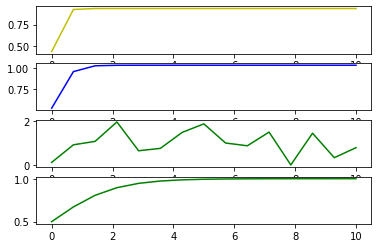

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

N = 15
x = np.linspace(0, 10, N)
y = 1 / (1 + np.e ** (-x))
y_noised = 1 / (1 + np.e ** (-x)) + 0.5 * np.random.randn(len(x))


def model(params, x):
    a, b = params
    return 1 / (1 + np.e ** (-x * a)) + b


def l1_fit(x0, x, y):
    y_pred = model(x0, x)
    return np.sum(np.abs(y - y_pred))


def l2_fit(x0, x, y):
    y_pred = model(x0, x)
    return np.sum(np.abs((y - y_pred) ** 2))


xopt1 = opt.fmin(func=l1_fit, x0=[1, 1], args=(x, y_noised))
xopt2 = opt.fmin(func=l2_fit, x0=[1, 1], args=(x, y_noised))

y_est1 = xopt1[1] + 1 / (1 + np.e ** (-x * xopt1[0]))
y_est2 = xopt2[1] + 1 / (1 + np.e ** (-x * xopt2[0]))


plt.subplot(411)
plt.plot(x, y_est1, 'y-')

plt.subplot(412)
plt.plot(x, y_est2, 'b-')

plt.subplot(413)
plt.plot(x, y_noised, 'g-')

plt.subplot(414)
plt.plot(x, y, 'g-')
plt.show()